<a href="https://colab.research.google.com/github/QuimicaLi/MLBedu/blob/main/Sesion-03/Ejemplo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# K-Means

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
# Carga el conjunto de datos Iris
iris = load_iris()
X = iris.data  # Características de las flores


In [6]:
# Configura el modelo K-Means con un rango de K (número de clusters) para probar
k_range = range(2, 11)
mean_silhouette_scores = []

# El silhouette_score es una métrica de evaluación comúnmente utilizada para
# medir la calidad de los clusters en un algoritmo de clustering, como K-Means.
# Esta métrica cuantifica cuán similares son los objetos dentro de un mismo
# cluster (cohesión) en comparación con los objetos en clusters vecinos
# (separación).
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    mean_silhouette_scores.append(silhouette_avg)

In [7]:
# Encuentra el valor óptimo de K basado en el coeficiente de silueta
optimal_k = k_range[np.argmax(mean_silhouette_scores)]


In [8]:
# Configura el modelo K-Means con el valor óptimo de K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

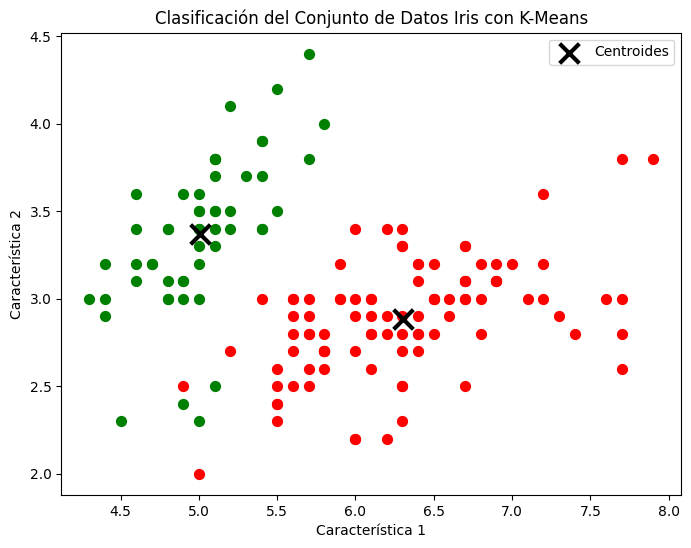

In [9]:
# Asignar cada punto de datos a un cluster
cluster_labels = kmeans.predict(X)

# Extraer los centroides de los clusters
centroids = kmeans.cluster_centers_

# Crear un gráfico de dispersión para visualizar la clasificación
plt.figure(figsize=(8, 6))

# Colores para representar los clusters
colors = ['red', 'green', 'blue']

# Asignar un color a cada punto de datos según su cluster
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], c=colors[cluster_labels[i]], s=50)

# Marcar los centroides de los clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroides')

# Etiquetar los ejes
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Mostrar el gráfico
plt.legend()
plt.title('Clasificación del Conjunto de Datos Iris con K-Means')
plt.show()

# Análisis de grupos mediante gráficas de densidad

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.stats import norm

In [11]:
# Generamos datos de ejemplo
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

In [12]:
# Aplicamos K-Means para agrupar los datos
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [13]:
# Obtenemos las etiquetas de clúster para cada punto de datos
labels = kmeans.labels_

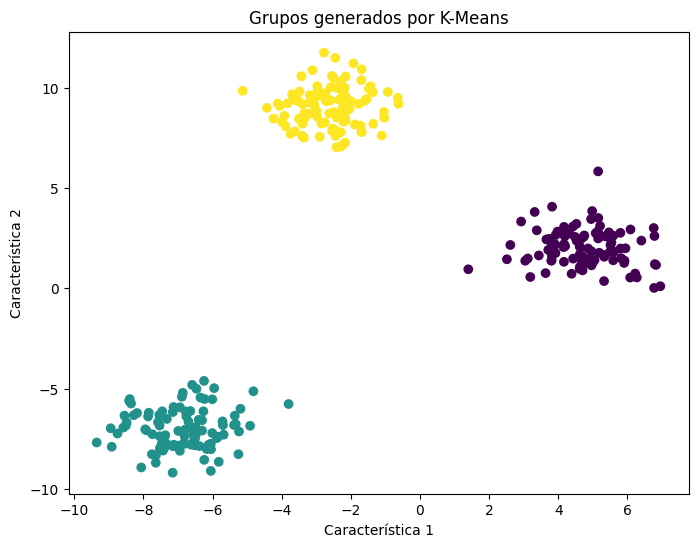

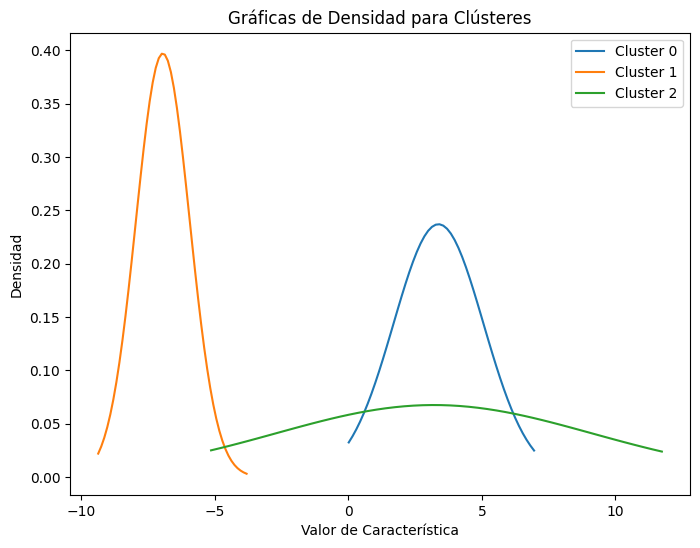

In [14]:
# Visualizamos los datos y los clústeres
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Grupos generados por K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Graficamos las densidades de cada clúster
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    cluster_data = X[labels == i]
    density = norm.pdf(np.linspace(cluster_data.min(), cluster_data.max()),
                       cluster_data.mean(), cluster_data.std())
    plt.plot(np.linspace(cluster_data.min(), cluster_data.max()), density, label=f'Cluster {i}')

plt.title('Gráficas de Densidad para Clústeres')
plt.xlabel('Valor de Característica')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Método del codo

## Descripción.
El método del codo es una técnica utilizada para determinar el número óptimo de clústeres (k) en un algoritmo de clustering como K-Means. Se basa en la idea de que a medida que aumentamos el número de clústeres, la variabilidad dentro de cada clúster disminuye. El punto en el que la disminución de la variabilidad se vuelve significativamente más lenta se denomina "punto de codo" y generalmente se considera como el número óptimo de clústeres. Aquí tienes un ejemplo básico de cómo aplicar el método del codo utilizando Python y la biblioteca sklearn:

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [16]:
# Generamos datos de ejemplo
n_samples = 300
n_features = 2
n_clusters_range = range(1, 11)  # Probaremos k desde 1 hasta 10
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

In [17]:
# Calculamos la inercia para diferentes valores de k
inertia = []
for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init = 'auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

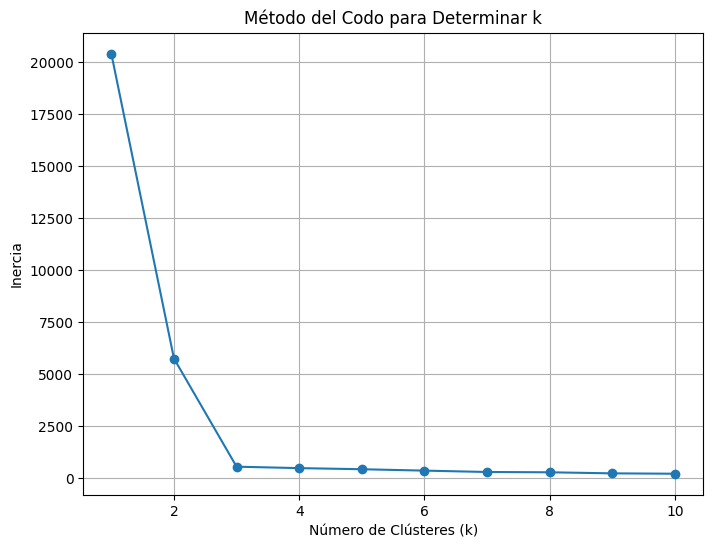

In [18]:
# Graficamos la inercia en función de k
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia, marker='o')
plt.title('Método del Codo para Determinar k')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

En este ejemplo:

1. Generamos datos de ejemplo utilizando `make_blobs` para simular datos con tres clústeres.
1. Luego, realizamos un ciclo sobre diferentes valores de k (desde 1 hasta 10) y aplicamos K-Means para cada valor de k.
1. Calculamos la inercia (suma de las distancias al cuadrado de cada punto al centro de su clúster) para cada valor de k y lo almacenamos en la lista inertia.
1. Finalmente, graficamos la inercia en función de k y buscamos el punto en el que la disminución de la inercia se hace más lenta, que suele ser el "punto de codo".

El número óptimo de clústeres será aquel en el que la disminución de la inercia se vuelva significativamente más lenta, como se muestra en el gráfico generado.

## Sistemas de recomendación